# User Profiling and Segmentation

Bu projede internet kullanıcıları, kullanım durumlarına göre kümelenmeye çalışılmıştır.
<br>Projede kullanılan veriler <a href="https://thecleverprogrammer.com/2024/02/26/user-profiling-and-segmentation-using-python/" target="_blank">
buradan</a> temin edilmiştir.
<br>
<img src="https://www.webtekno.com/images/editor/default/0001/64/ec24f173a110d78ae24795a5b07dbf1e1156e5c1.jpeg" width="300px">

In [5]:
import pandas as pd
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("user_profiles_for_ads.csv")

## Keşfedici Veri Analizi (EDA)

In [3]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

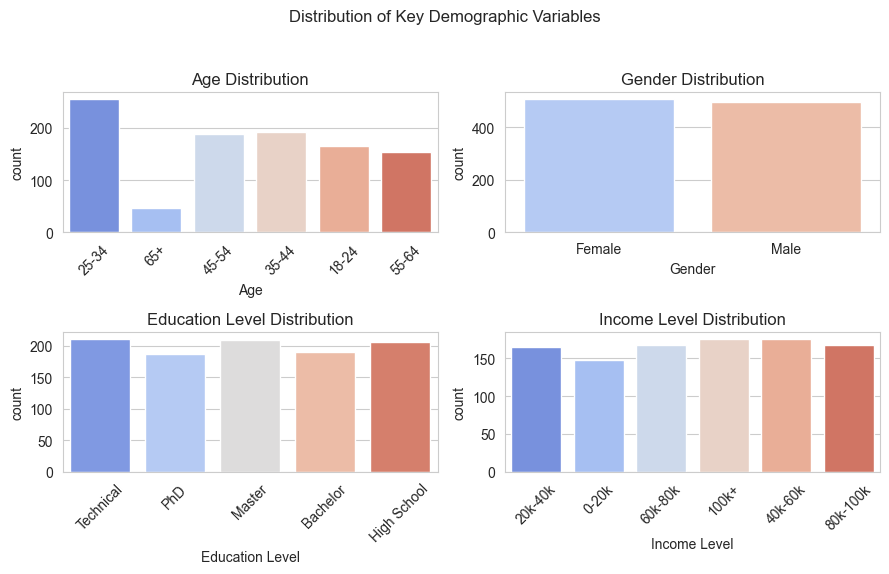

In [8]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(9, 6))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=df, palette='coolwarm')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# gender distribution
sns.countplot(ax=axes[0, 1], x='Gender', data=df, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=df, palette='coolwarm')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=df, palette='coolwarm')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

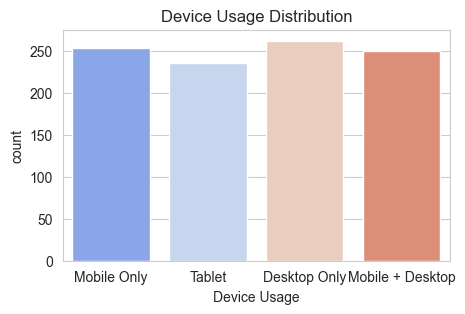

In [11]:
# device usage distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='Device Usage', data=df, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

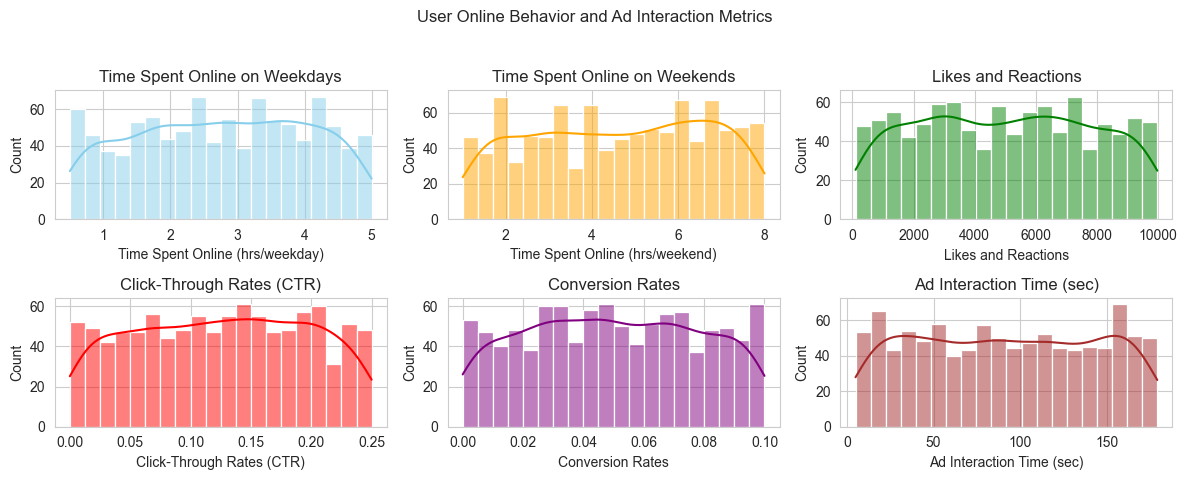

In [20]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=df, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=df, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[0, 2], x='Likes and Reactions', data=df, bins=20, kde=True, color='green')
axes[0, 2].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 0], x='Click-Through Rates (CTR)', data=df, bins=20, kde=True, color='red')
axes[1, 0].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[1, 1], x='Conversion Rates', data=df, bins=20, kde=True, color='purple')
axes[1, 1].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[1, 2], x='Ad Interaction Time (sec)', data=df, bins=20, kde=True, color='brown')
axes[1, 2].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Kategorik ve Numerik alanların dönüşümü

Normalde her bir alanı tek tek inceleyip ona göre dönüşüm veya normalize işlemleri yapılıyordu. Burada farklı bir yöntem
deneyerek ön işleme yapılacak alanları belirleyip model eğitimi esnasında kullanılmaktadır. Böylece numerik ve kategorik
alanlara önceden ne işlem yapılacağı belirlenir ve model eğitimi aşamasında ön işlemden geçirilerek modelde kullanılır.
<br> Bu kısımda ve yukarıdaki grafiklerin oluşturulmasında 
<a href="https://thecleverprogrammer.com/2024/02/26/user-profiling-and-segmentation-using-python/" target="_blank">buradan</a>
faydalınılmıştır.

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [22]:
# Kümelemede kullanılacak alanların seçimi
cols = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 
            'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
X = df[cols]

In [23]:
# Numerik alanları belirleyelim ve bu alanlara Normalleştirme uygulayalım
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()
# Kategorik alanları belirleyelim ve bu alanları sayıya çevirmek için One Hot Encoder uygulayalım
categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

In [24]:
# Ön işleme adımlarını belirleyelim
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

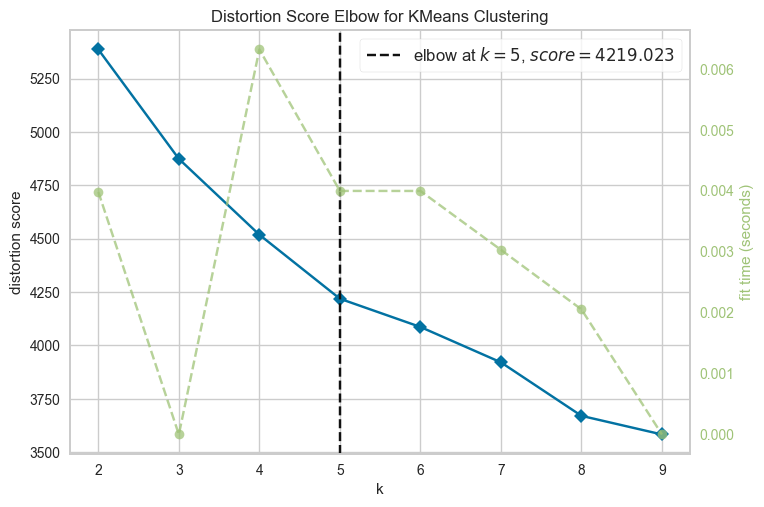

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# KElbowVisualizer kullanarak Elbow grafiği çizdirelim
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(preprocessor.fit_transform(X))
visualizer.show()

In [32]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('cluster', KMeans(n_clusters=5, random_state=42))])
pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
df['Cluster'] = cluster_labels

In [35]:
df.sample(5)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
258,259,35-44,Female,Rural,Hindi,Master,8434,387,Desktop Only,2.7,4.0,0.104,0.036,100,40k-60k,"DIY Crafts, Photography",3
869,870,55-64,Female,Rural,English,Bachelor,3183,430,Mobile Only,4.7,1.7,0.226,0.049,34,60k-80k,"Investing and Finance, Photography, Travel and...",2
876,877,45-54,Male,Rural,Spanish,PhD,6895,217,Tablet,4.2,1.8,0.084,0.051,103,80k-100k,Travel and Adventure,2
872,873,45-54,Female,Suburban,Spanish,Technical,965,56,Mobile + Desktop,4.0,2.9,0.210,0.045,138,60k-80k,"Gourmet Cooking, Investing and Finance, Fashio...",0
454,455,18-24,Male,Urban,Spanish,Bachelor,7540,112,Mobile + Desktop,3.8,1.8,0.144,0.073,105,100k+,"DIY Crafts, Photography",2


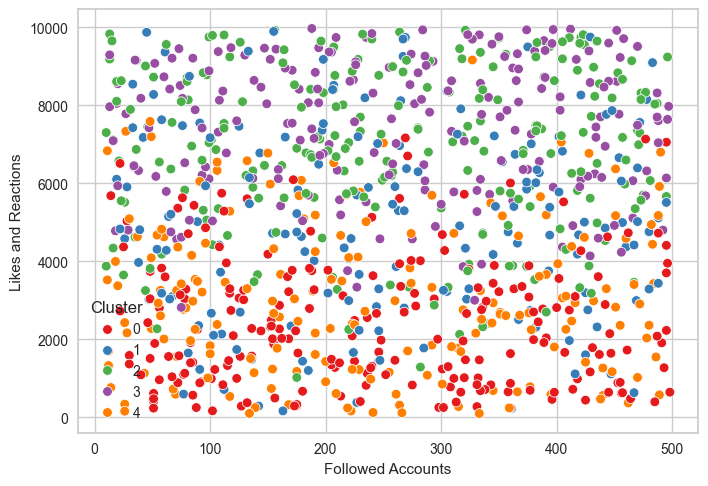

In [38]:
sns.scatterplot(x=df['Followed Accounts'], y=df['Likes and Reactions'], hue=df['Cluster'], palette='Set1');

In [41]:
# Her bir sütunun küme ortalamasını hesaplayalım
cluster_means = df.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means.head()

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.911111,5.212963,2409.620370,0.149588,25-34,Female,80k-100k
1,1.559394,6.002424,5005.121212,0.179836,35-44,Male,80k-100k
2,3.019737,2.584211,6861.587719,0.170614,25-34,Male,20k-40k
3,3.080882,5.774510,7457.602941,0.067971,25-34,Female,100k+
4,1.809626,3.839572,3021.219251,0.056594,45-54,Female,0-20k


In [43]:
df[numeric_features].describe()

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.757500,4.601600,4997.084000,0.125333
std,1.279735,2.026234,2838.494365,0.071187
min,0.500000,1.000000,101.000000,0.000000
25%,1.700000,2.900000,2661.250000,0.065000
50%,2.800000,4.700000,5002.500000,0.128000
75%,3.800000,6.400000,7348.750000,0.186000
max,5.000000,8.000000,9973.000000,0.250000


### Sonuç
* Küme-0: Ortayaş altı kadınların çoğunlukta olduğu, hafta içi ve hafta sonu yoğun kullanımda olan, düşük beğeni ve reaksiyon oranı
* Küme-1: Ortayaş erkeklerin çoğunlukta olduğu, hafta içi az hafta sonu yoğun kullanımda olan, orta düzey beğeni ve reaksiyon oranı
* Küme-2: Ortayaz altı erkeklerin çoğunlukta olduğu, hafta içi yüksek, haftasonu düşük kullanımda olan, yüksek beğeni ve reaksiyon oranı
* Küme-3: Yüksek gelirli ortayaş altı kadınlar, yoğun kullanım ve yüksek beğeni ve reaksiyon oranı
* Küme-4: Düşük gelirli ileri yaş kadınlar, düşük kullanım, düşük beğeni ve reaksiyon oranı

Yukarıdaki küme özelliklerine bakıldığında 5 farklı kullanıcı türü olduğu görülmektedir. Bu türler haftaiçi, haftasonu kullanım durumları, beğeni ve reaksiyon oranları ile yaşa ve cinsiyete göre değişiklik göstermektedir.